In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\pavan\Desktop\data science\linear regression\Student_Performance (1) (1).csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df=df.select_dtypes(include='number')

In [5]:
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0
...,...,...,...,...,...
9995,1,49,4,2,23.0
9996,7,64,8,5,58.0
9997,6,83,8,5,74.0
9998,9,97,7,0,95.0


In [6]:
x=df.drop('Performance Index',axis=1)
y=df['Performance Index']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=42)

In [8]:
model=LinearRegression()

In [9]:
model.fit(x_train,y_train)

LinearRegression()

In [10]:
x_test

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
6252,5,69,8,2
4684,2,46,4,8
1731,7,56,7,5
4742,6,42,8,5
4521,7,53,4,6
...,...,...,...,...
1638,2,96,5,5
5891,1,66,8,7
7427,8,47,7,1
608,7,99,5,4


In [11]:
y_test

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
1638    75.0
5891    39.0
7427    36.0
608     90.0
6907    46.0
Name: Performance Index, Length: 8000, dtype: float64

In [12]:
model.predict(x_test)

array([55.13771485, 22.15243364, 47.62078349, ..., 40.66810862,
       90.25077468, 43.04542736], shape=(8000,))

In [13]:
model.intercept_

np.float64(-33.6649183374322)

In [14]:
model.coef_

array([2.86039637, 1.0180332 , 0.49137175, 0.1626931 ])

testing the model score

In [15]:
model.score(x_test,y_test)

0.9884265236219464

checking data linear or not

In [16]:
import seaborn as sns

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

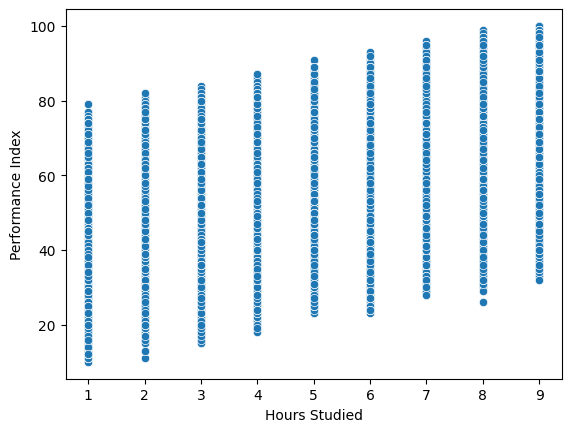

In [17]:
sns.scatterplot(df,x='Hours Studied',y='Performance Index')

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

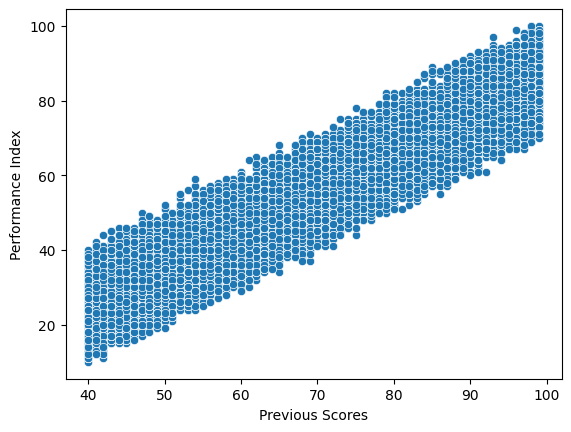

In [18]:
sns.scatterplot(df,x='Previous Scores',y='Performance Index')

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

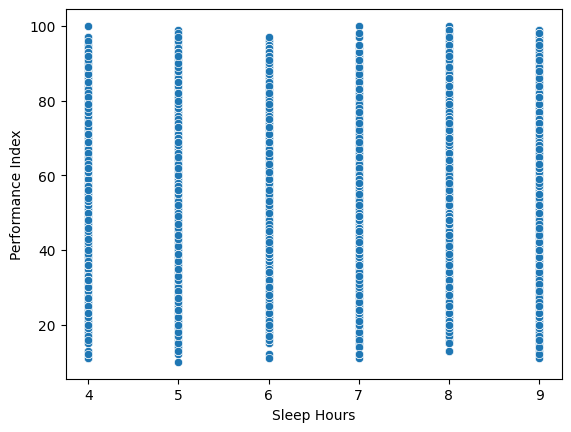

In [19]:
sns.scatterplot(df,x='Sleep Hours',y='Performance Index')

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

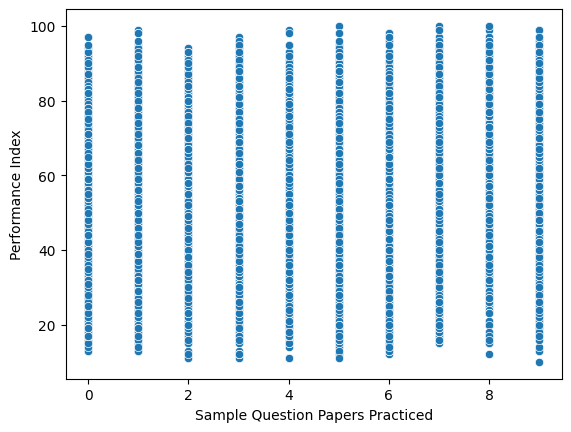

In [20]:
sns.scatterplot(df,x='Sample Question Papers Practiced',y='Performance Index')

In [21]:
df.corr()['Performance Index']

Hours Studied                       0.373730
Previous Scores                     0.915189
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Performance Index                   1.000000
Name: Performance Index, dtype: float64

the below metod include evaluation matrix

In [22]:
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error

In [23]:

pred=model.predict(x_test)
r2_score(y_test,pred) # always need to pass actual and predicted value as argument

0.9884265236219464

In [24]:
mean_squared_error(y_test,pred)# avg squared error not actual error

4.256861384298592

In [25]:
rmse=root_mean_squared_error(y_test,pred)# gives actual error used when mse value is too big to understand

In [26]:
target_mean=y_test.mean()

In [27]:
rmse/target_mean

np.float64(0.03735240777056793)

checking train and testing accuracy for underfit,good fit and over fit

In [28]:
model.score(x_train,y_train)

0.9886234608816586

In [29]:
model.score(x_test,y_test)

0.9884265236219464

In [30]:
y_pred_train=model.predict(x_train)
r2_score(y_train,y_pred_train)

0.9886234608816586

In [31]:
y_pred_test=model.predict(x_test)
r2_score(y_test,y_pred_test)

0.9884265236219464

# Normalization

In [32]:
data=pd.DataFrame({'Age':[22,25,40,48,52],'Salary':[21000,45000,100000,125000,150000]})
data

,Age,Salary
0,22,21000
1,25,45000
2,40,100000
3,48,125000
4,52,150000


In [33]:
x1=data[['Age']] # accepts only 2D array
y1=data['Salary']

In [34]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,random_state=42,train_size=0.8)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()

In [37]:
res=scaler.fit_transform(x_train1)
res

array([[ 0.99811498],
       [-0.0433963 ],
       [-1.60566324],
       [ 0.65094455]])

In [38]:
scaler.mean_

array([40.5])

In [39]:
scaler.scale_

array([11.52171862])

In [40]:
res1=scaler.transform(x_test1)
res1

array([[-1.34528541]])